In [4]:
# cnn model
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from numpy import load
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import os
 
# loads dataset from directory
def load_dataset():
    dirpath = os.getcwd()
    trainX = load(dirpath +"/data/1d arrays/trainX1d.npy") #(4000, 43000, 1)
    trainy = load(dirpath + "/data/1d arrays/trainY1d.npy") #(4000,)
    testX = load(dirpath + "/data/1d arrays/testX1d.npy") #(1000, 43000, 1)
    testy = load(dirpath + "/data/1d arrays/testY1d.npy") #(1000,)
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    return trainX, trainy, testX, testy

# takes one out of one-hundred timesteps to make the dataset a manageable size
def make_small(trainX, testX):
    new_trainX = np.array([])
    new_testX = np.array([])    
    for i in trainX:
        new_trainX = np.append(new_trainX, i[::100])
    new_trainX.resize((trainX.shape[0], int(trainX.shape[1] / 100), 1))   
    print(new_trainX.shape) # test   
    for i in testX:
        new_testX = np.append(new_testX, i[::100])
    new_testX.resize((testX.shape[0], int(testX.shape[1] / 100), 1))   
    print(new_trainX.shape)  
    return new_trainX, new_testX
  
# returns the maximum and minimum of a multidimensional array
def find_stats(arr):
    maximum = max(arr.flatten())
    minimum = min(arr.flatten())
    return maximum, minimum

# standardize the array with dimension (# samples, # timesteps for samples, 1)
def standardize(arr):  
    maximum, minimum = find_stats(arr)
    r = maximum - minimum
    return (arr - minimum) / r
        
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
    print("In evaluate_model") #TEST
    verbose, epochs, batch_size = 1, 5, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=verbose)
    return accuracy
 
# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run the experiment
def run_experiment(repeats=10): # repeats should be 10
    # load data
    print("before load_dataset") #TEST
    trainX, trainy, testX, testy = load_dataset()
    trainX, testX = make_small(trainX, testX)
    trainX, testX = standardize(trainX), standardize(testX)
    print("after load_dataset") #TEST
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(trainX, trainy, testX, testy)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)

run_experiment()
# SCORE TO BEAT: 75.380

before load_dataset
(3751, 432, 1)
(3751, 432, 1)
after load_dataset
In evaluate_model
432 1
Epoch 1/5
3751/3751 [==============================] - 8s 2ms/step - loss: 0.5157 - acc: 0.7609
Epoch 2/5
3751/3751 [==============================] - 6s 2ms/step - loss: 0.3141 - acc: 0.8608
Epoch 3/5
3751/3751 [==============================] - 6s 2ms/step - loss: 0.1716 - acc: 0.9781
Epoch 4/5
3751/3751 [==============================] - 6s 2ms/step - loss: 0.1200 - acc: 0.9995
Epoch 5/5
1251/1251 [==============================] - 1s 646us/step
>#1: 99.840
In evaluate_model
432 1
Epoch 1/5
3751/3751 [==============================] - 8s 2ms/step - loss: 0.5229 - acc: 0.7593
Epoch 2/5
3751/3751 [==============================] - 6s 2ms/step - loss: 0.3586 - acc: 0.8432
Epoch 3/5
3751/3751 [==============================] - 6s 2ms/step - loss: 0.1974 - acc: 0.9576
Epoch 4/5
3751/3751 [==============================] - 6s 2ms/step - loss: 0.1296 - acc: 0.9931
Epoch 5/5
1251/1251 [=============

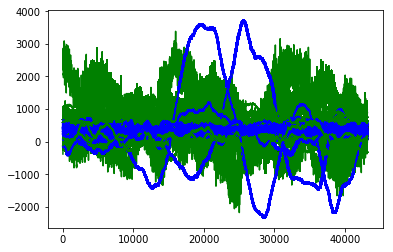

In [4]:
import os
from numpy import load
import numpy as np
import matplotlib.pyplot as plt

dirpath = os.getcwd()
trainX = load(dirpath + "/data/1d arrays/trainX1d.npy")
trainy = load(dirpath + "/data/1d arrays/trainY1d.npy") #(4000,)
testX = load(dirpath + "/data/1d arrays/testX1d.npy") #(1000, 43000, 1)
testy = load(dirpath + "/data/1d arrays/testY1d.npy") #(1000,)



        


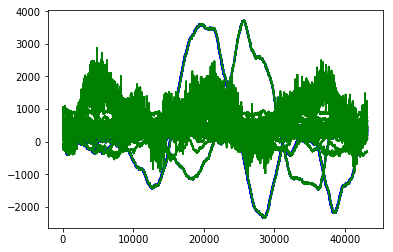

In [7]:
dolphinCounter = 0
neutrinoCounter = 0
for i in range(trainX.shape[0]):
    wf = trainX[i]
    wf = wf.flatten()
    if ((trainy[i] == 0) and (dolphinCounter < 100)):
        plt.plot(wf, color = 'blue') # dolphin click
        dolphinCounter += 1
    elif (neutrinoCounter < 100):
        plt.plot(wf, color = 'green') # neutrino click
        neutrinoCounter += 1
    elif (dolphinCounter == 100 and neutrinoCounter == 100):
        break

In [5]:
print(trainy.sum() / trainy.shape[0])

0.23513729672087444
